## Defining Directory

In [34]:
import os

In [35]:
neg_deceptive_dir = "DataSet/Dataset_Ott/negative_polarity/deceptive_from_MTurk"
neg_true_dir ="DataSet/Dataset_Ott/negative_polarity/truthful_from_Web"
pos_deceptive_dir ="DataSet/Dataset_Ott/positive_polarity/deceptive_from_MTurk"
pos_true_dir ="DataSet/Dataset_Ott/positive_polarity/truthful_from_TripAdvisor"


#### Importing deceptice review with negative sentiment

In [36]:
all_files = os.listdir(neg_deceptive_dir)

In [37]:
reviews=[]
file_names=[]
sentiment=[]
label_list=[]

In [38]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(neg_deceptive_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(0)
        label_list.append(0)

In [39]:
reviews[399]

"The Talbott Hotel claims to be Chicago's Premiere Small Luxury Hotel. After staying there and experiencing the service, environment, and the hotel in general, I can say with confidence that this just isn't true. I arrived with rather high expectations due to the claims made by the hotel and some of the reviews posted on their website and I was immediately disappointed. No one came to my car to collect my bags and I was forced to lug them inside myself. The doorman was polite but failed to even open the door for me, leaving me to fend for myself while trying to carry my bags. Once inside, the atmosphere was not what I expected. The lighting was poor, leaving the lobby dark and it looked like a dingy setting with a glossy veneer in an attempt to hide the degenerate state of the building. The carpet looked dirty, as if it hadn't been vacuumed or washed in quite some time, and up in the corners where the walls met the ceilings there was visible water damage. When I arrived at the front de

In [40]:
file_names[-1]

'd_talbott_9.txt'

#### Importing deceptice review with positive sentiment

In [41]:
all_files = os.listdir(pos_deceptive_dir)

In [42]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(pos_deceptive_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(1)
        label_list.append(0)


In [43]:
print(len(reviews))
print(len(file_names))

800
800


#### Importing truthful review with negative sentiment

In [44]:
all_files = os.listdir(neg_true_dir)

In [45]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(neg_true_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(0)
        label_list.append(1)

In [46]:
print(len(reviews))
print(len(file_names))

1200
1200


#### Importing truthful review with positive sentiment

In [47]:
all_files = os.listdir(pos_true_dir)

In [48]:
for file in all_files:
   # open the file and then call .read() to get the text
   with open(pos_true_dir+"/"+file) as f: 
        text = f.read()
        reviews.append(text)
        file_names.append(file)
        sentiment.append(1)
        label_list.append(1)

In [49]:
print(len(reviews))
print(len(file_names))

1600
1600


### Average length of deceptive reviews and truthful reviews

In [50]:
deceptive_reviews_splitted =[]
deceptive_review_total_word=0
for data in reviews[0:800]:
    review_words = data.split()
    deceptive_review_total_word+= len(review_words)
    deceptive_reviews_splitted.append(review_words)

In [51]:
len(deceptive_reviews_splitted)

800

In [52]:
print("Total words = ",deceptive_review_total_word)
print("Total deceptive reviews = ", len(deceptive_reviews_splitted))
print("Average total words = ", deceptive_review_total_word/len(deceptive_reviews_splitted))

Total words =  117309
Total deceptive reviews =  800
Average total words =  146.63625


In [53]:
truthful_reviews_splitted =[]
truthful_review_total_word=0
for data in reviews[800:1600]:
    review_words = data.split()
    truthful_review_total_word+= len(review_words)
    truthful_reviews_splitted.append(review_words)
    

In [54]:
len(truthful_reviews_splitted)

800

In [55]:
print("Total words = ",truthful_review_total_word)
print("Total deceptive reviews = ", len(truthful_reviews_splitted))
print("Average total words = ", truthful_review_total_word/len(truthful_reviews_splitted))

Total words =  120731
Total deceptive reviews =  800
Average total words =  150.91375


### Distribution of deceptive reviews length

In [56]:
import matplotlib.pyplot as plt

In [57]:
deceptive_lengths = []
for x in deceptive_reviews_splitted:
    deceptive_lengths.append(len(x))
truthful_lengths = []
for x in truthful_reviews_splitted:
    truthful_lengths.append(len(x))

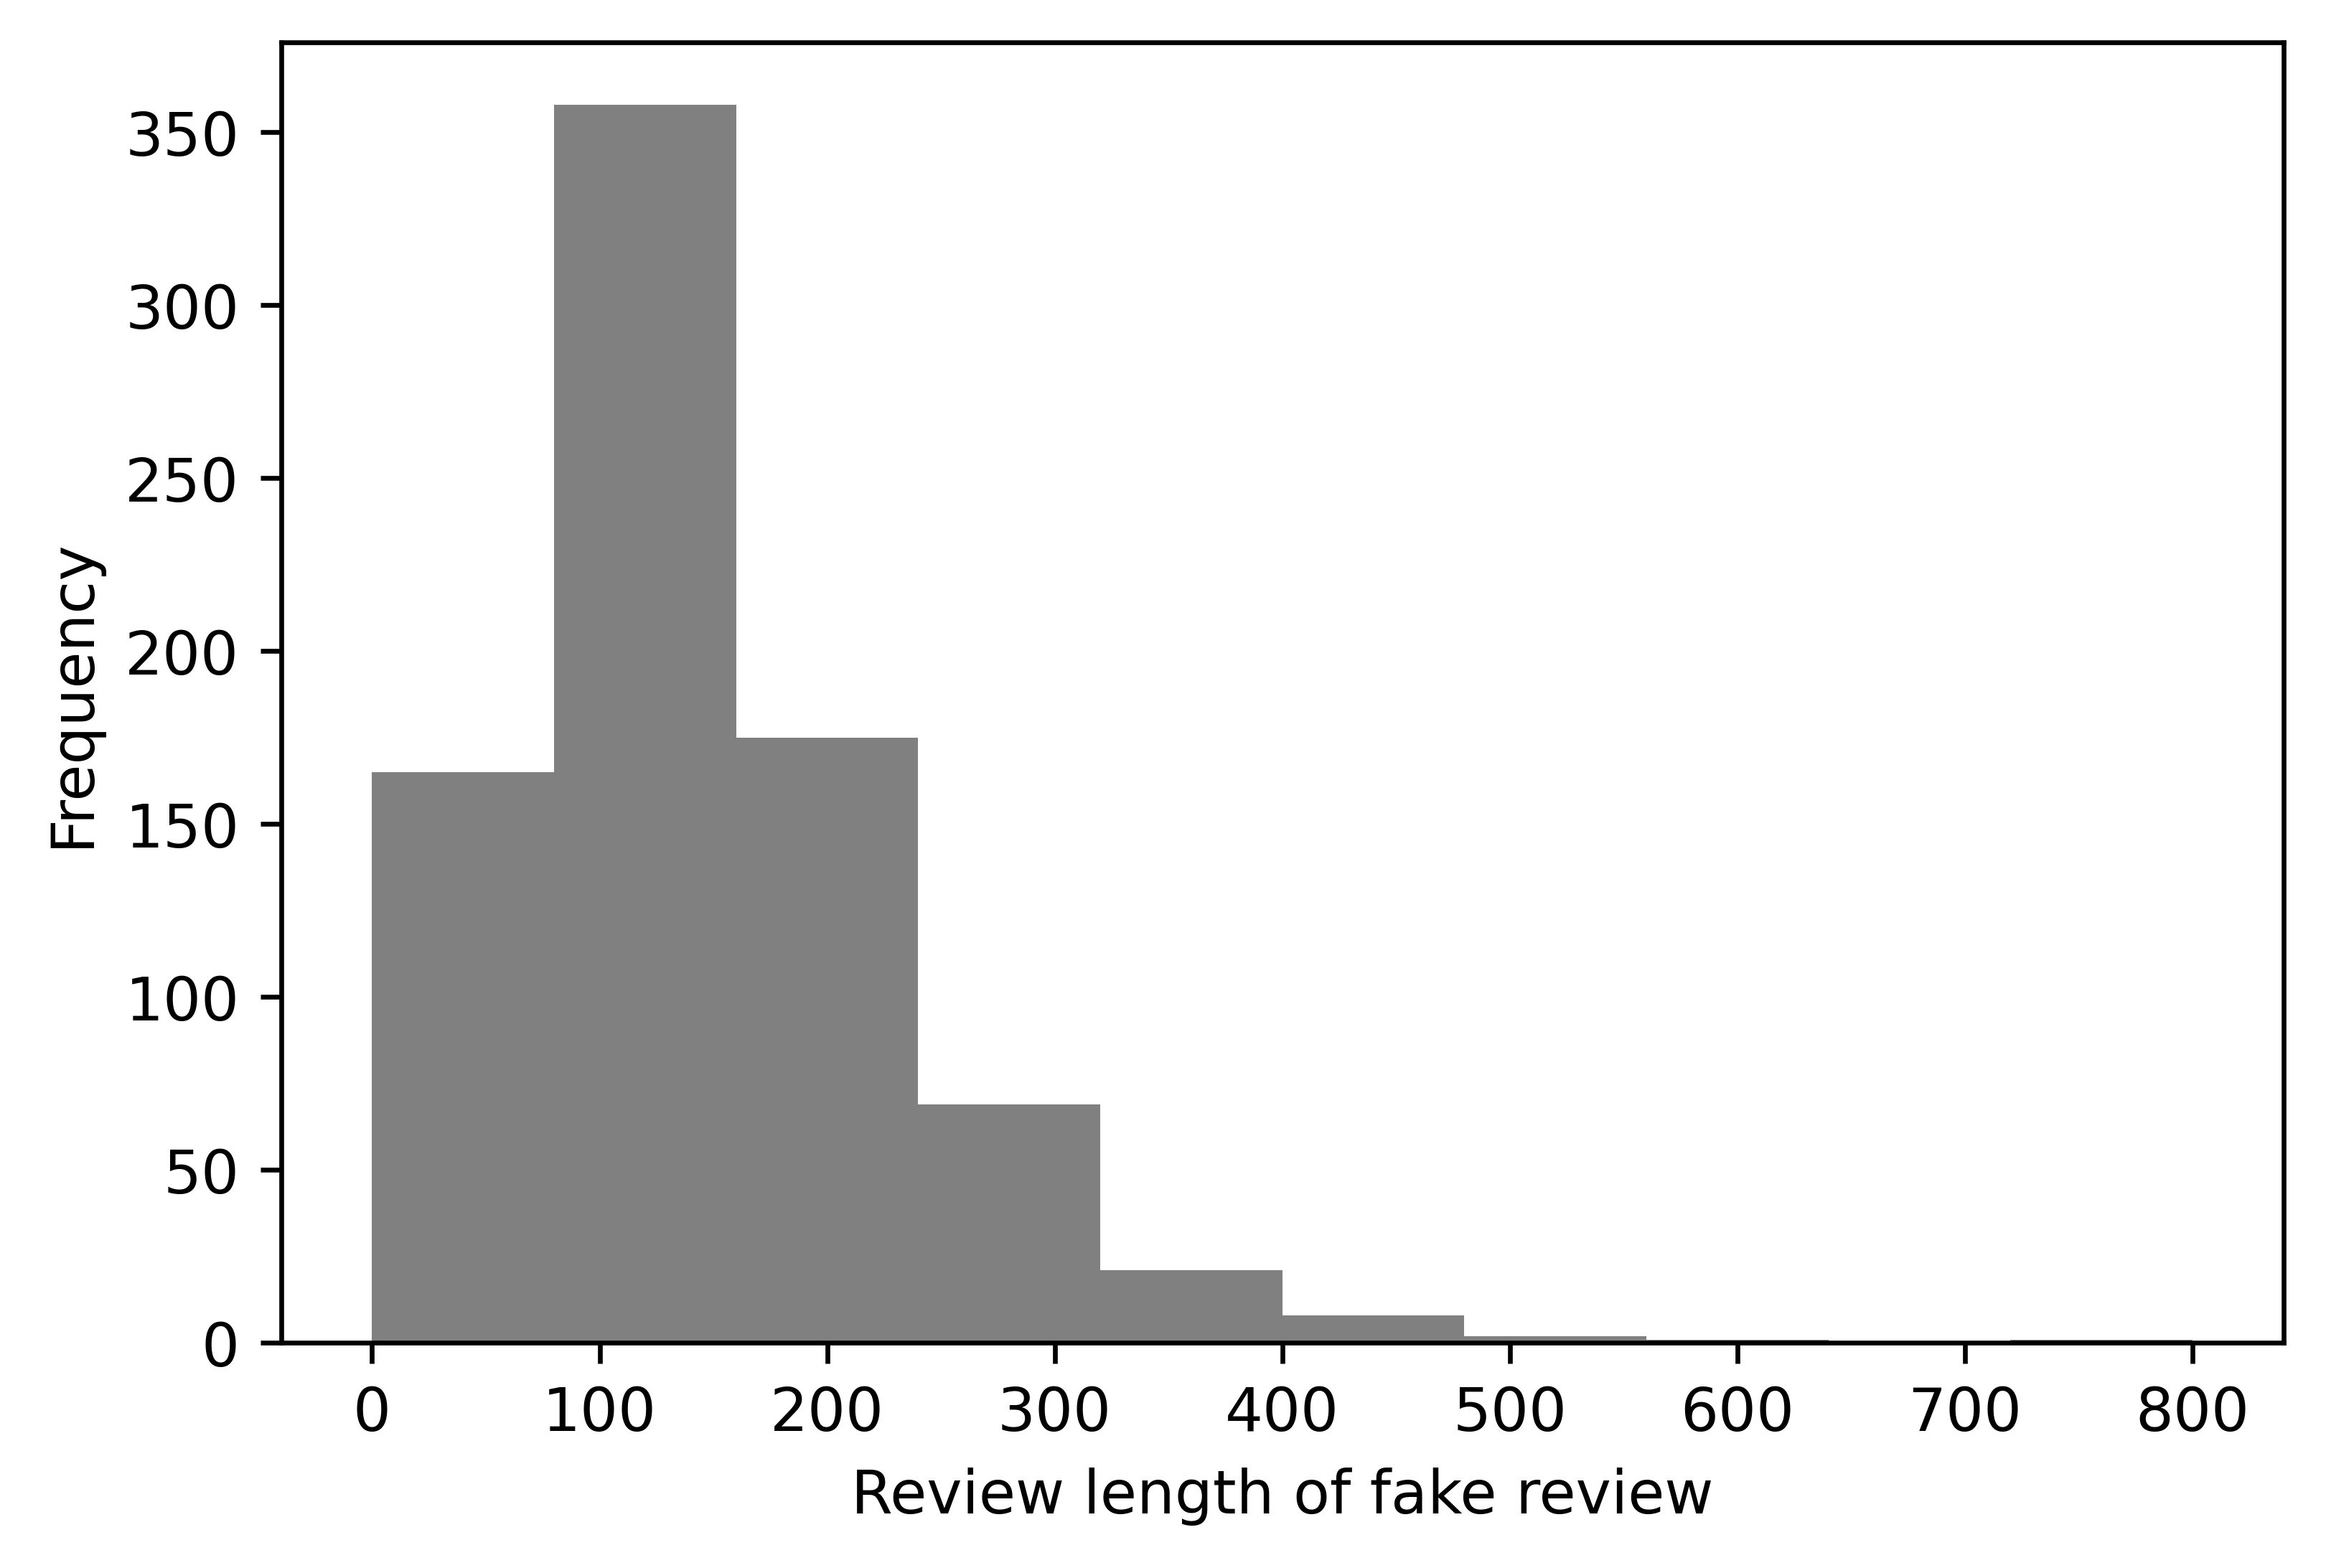

In [58]:
plt.figure(dpi=600)
plt.hist(deceptive_lengths,color="gray",range = [0,800])
plt.xlabel("Review length of fake review")
plt.ylabel("Frequency")
plt.savefig("review_length_fake.png")
plt.show()

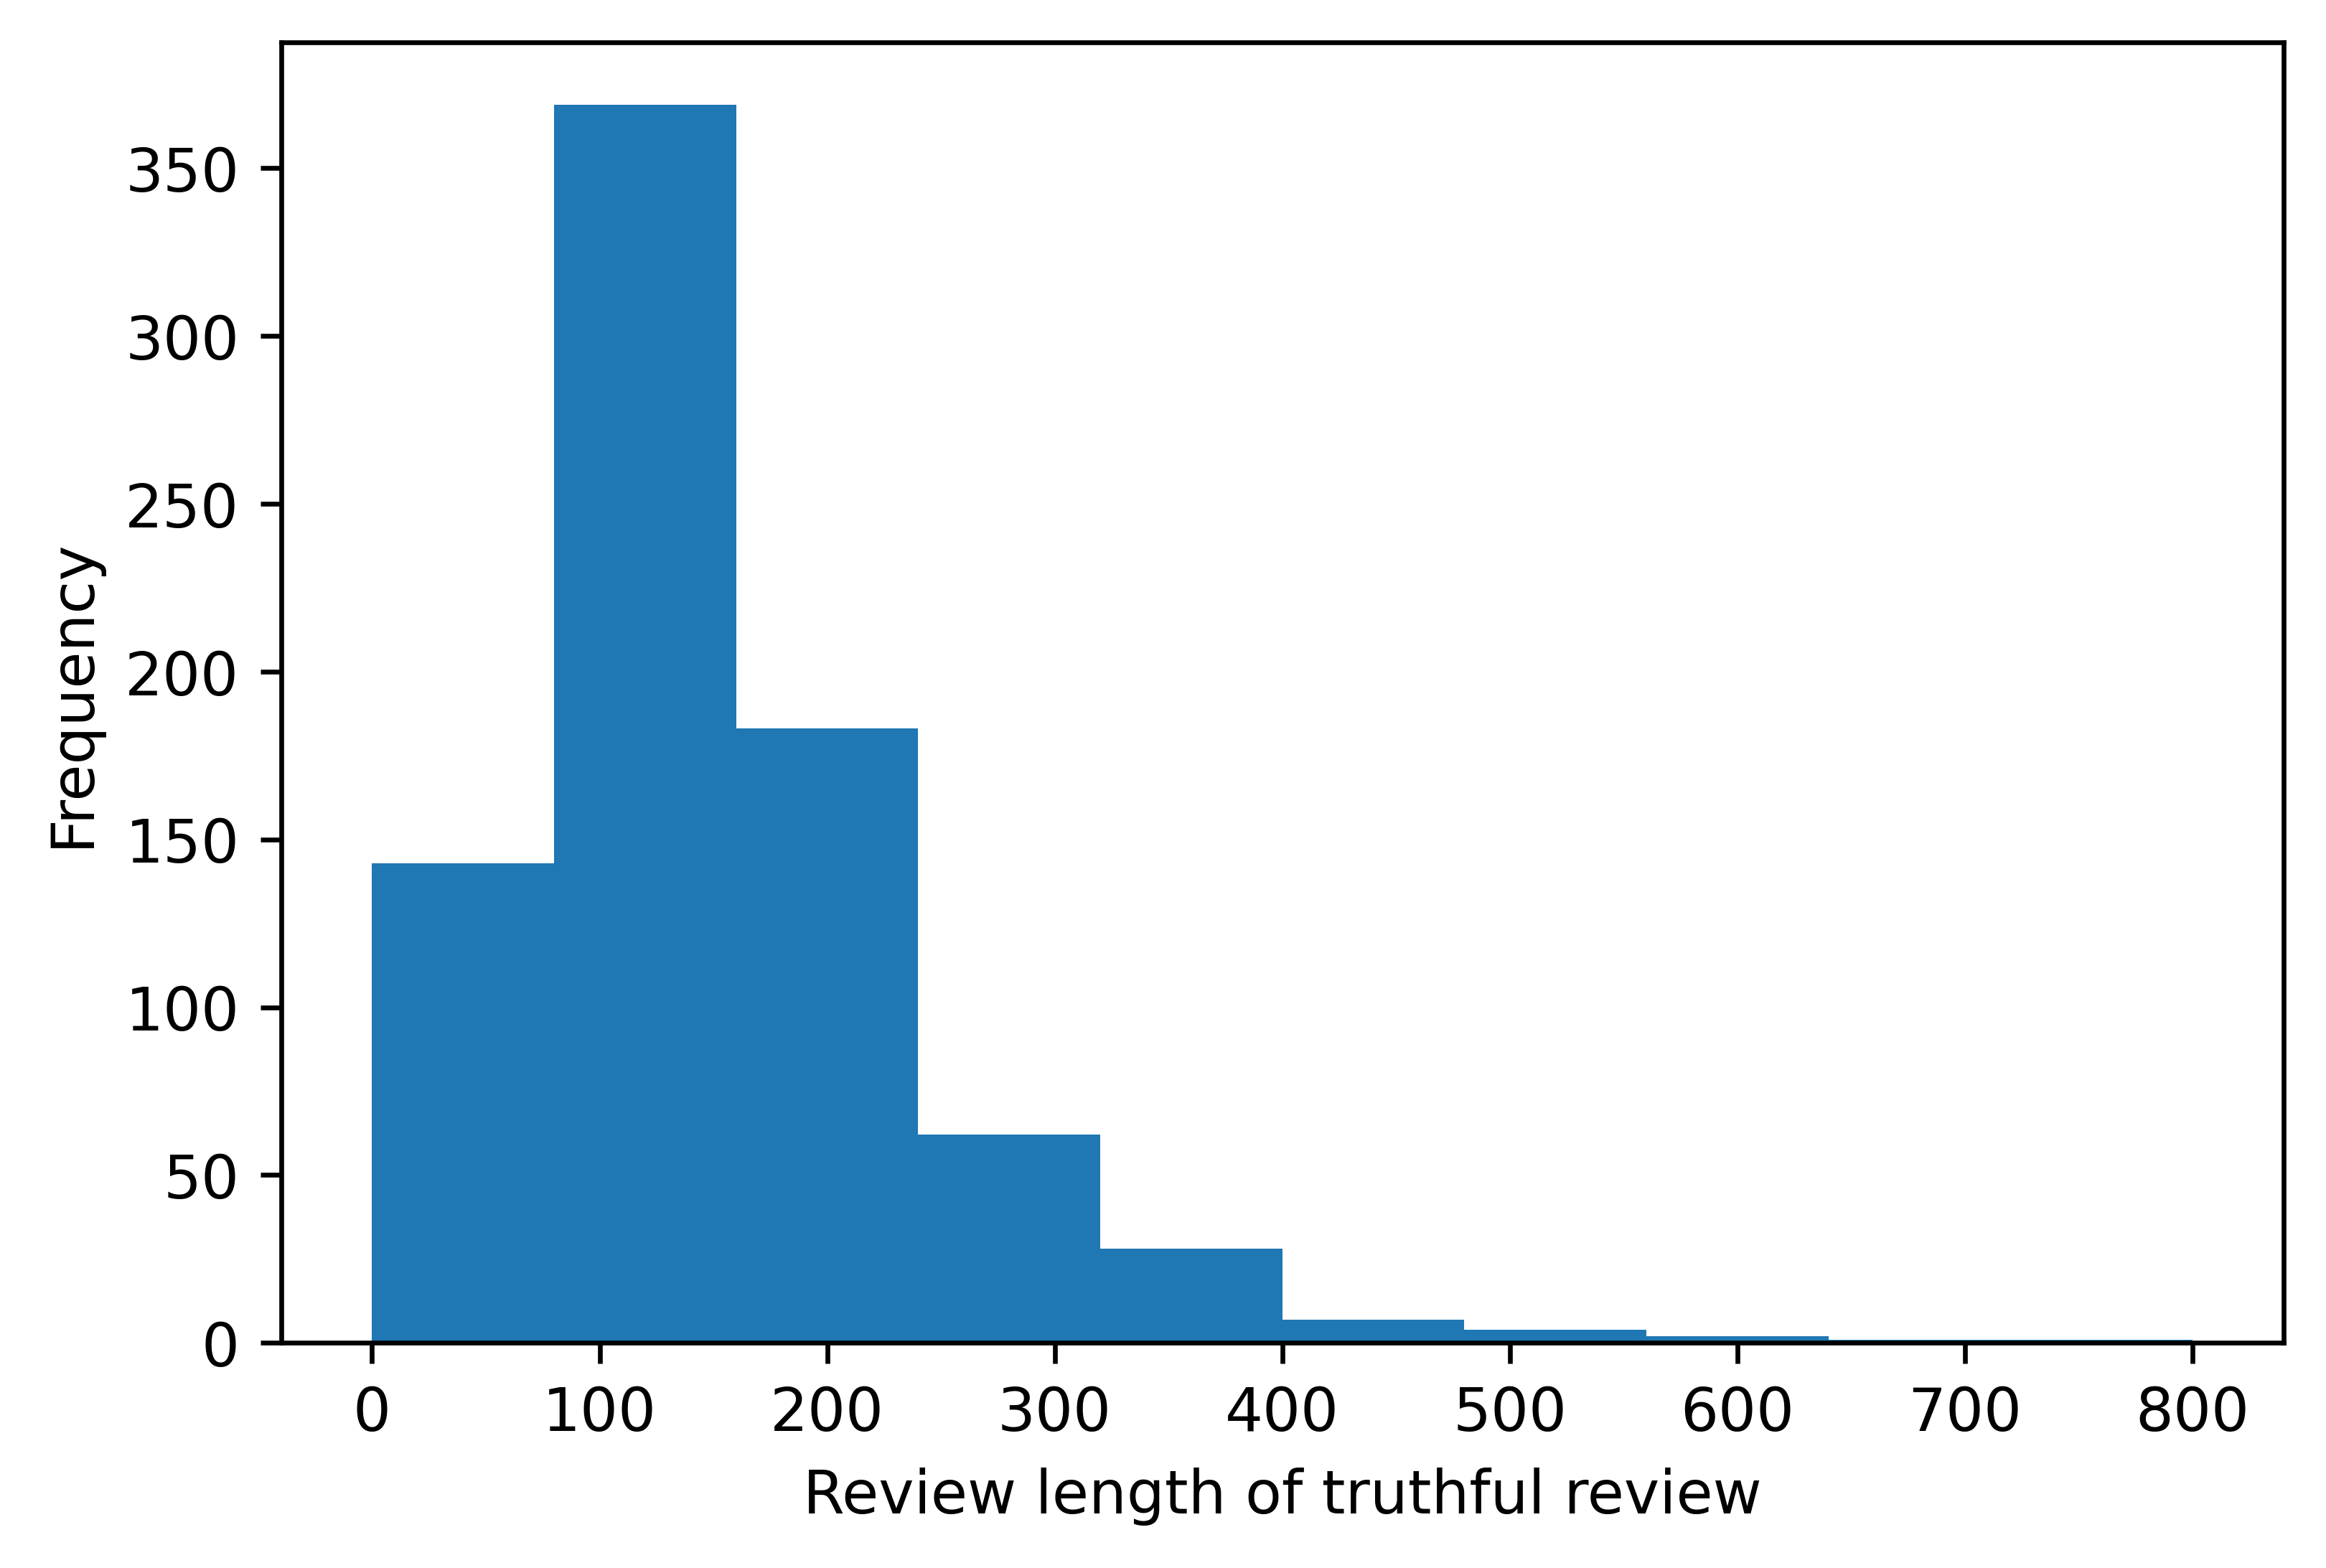

In [59]:
plt.figure(dpi=600)
plt.hist(truthful_lengths, range = [0,800])
plt.xlabel("Review length of truthful review")
plt.ylabel("Frequency")
plt.savefig("review_length_true.png")
plt.show()


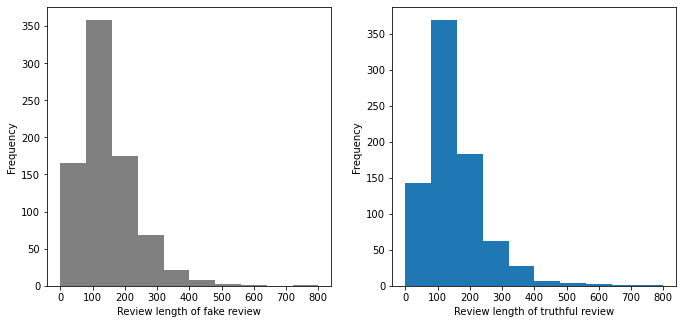

In [130]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.tight_layout(pad=3.0)
ax1.hist(deceptive_lengths,color="gray",range = [0,800])
ax1.set(xlabel='Review length of fake review', ylabel='Frequency')

ax2.hist(truthful_lengths, range = [0,800])
ax2.set(xlabel='Review length of truthful review', ylabel='Frequency')

plt.savefig("review_length.png",dpi = 600)
plt.show()

### Creating a pandas dataframe to structure the data and visualizing data columns

In [61]:
import pandas as pd

In [62]:
data = pd.DataFrame([])

In [63]:
data["name"] = file_names

In [64]:
data["reviews"]=reviews

In [65]:
data["reviews_splitted"] = data["reviews"].apply(lambda x: x.split())

In [66]:
data["review_length"] = data["reviews_splitted"].apply(lambda x: len(x))

In [67]:
data["sentiment"]=sentiment
data["sentiment"] = data["sentiment"]

In [68]:
data

,name,reviews,reviews_splitted,review_length,sentiment
0,d_affinia_1.txt,Affinia Chicago is one of the worst hotels I h...,"[Affinia, Chicago, is, one, of, the, worst, ho...",164,0
1,d_affinia_10.txt,I recently stayed at the Affina Chicago hotel ...,"[I, recently, stayed, at, the, Affina, Chicago...",224,0
2,d_affinia_11.txt,I stayed at the Affina Chicago for my annivers...,"[I, stayed, at, the, Affina, Chicago, for, my,...",68,0
3,d_affinia_12.txt,If you are looking for a high end hotel on the...,"[If, you, are, looking, for, a, high, end, hot...",146,0
4,d_affinia_13.txt,I just returned from a long weekend in Chicago...,"[I, just, returned, from, a, long, weekend, in...",250,0
...,...,...,...,...,...
1595,t_talbott_5.txt,I stayed at The Talbott for 3 nights on busine...,"[I, stayed, at, The, Talbott, for, 3, nights, ...",90,1
1596,t_talbott_6.txt,We loved the Talbott. The location was fabulou...,"[We, loved, the, Talbott., The, location, was,...",110,1
1597,t_talbott_7.txt,My husband attended a conference in Chicago fo...,"[My, husband, attended, a, conference, in, Chi...",215,1
1598,t_talbott_8.txt,This is a great find for downtown Chicago. The...,"[This, is, a, great, find, for, downtown, Chic...",134,1


In [69]:
import sklearn

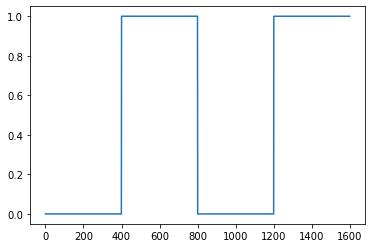

In [70]:
data["sentiment"].plot()

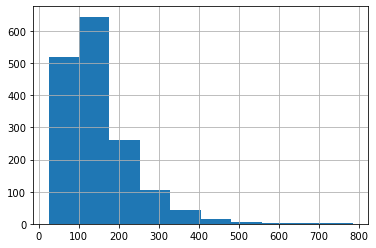

In [71]:
data["review_length"].hist()

In [72]:
data["label"] = label_list

## Word count from reviews

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
dataset_word_counts = count_vect.fit_transform(data["reviews"])
print(dataset_word_counts.shape)

(1600, 9571)


## Implementing tf-idf from word cound

In [74]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
dataset_tfidf = tfidf_transformer.fit_transform(dataset_word_counts)
dataset_tfidf.shape
data["tf_idf"] = dataset_tfidf

### Implementing empath opensource instead of paid LIWC

In [75]:
import numpy as np
from empath import Empath
lexicon = Empath()
data["empath"] = data["reviews"].apply(lambda x: lexicon.analyze(x,normalize=True))
print(data["empath"][401])


data["empath_vectors"]= data["empath"].apply(lambda x: list(x.values()))
array = pd.DataFrame.to_numpy(data["empath_vectors"])
empath_array = np.zeros((1600,194))
for i in range (0,1600):
    empath_array[i]= array[i]
print(empath_array.shape)

{'help': 0.0, 'office': 0.017543859649122806, 'dance': 0.0, 'money': 0.0, 'wedding': 0.017543859649122806, 'domestic_work': 0.0, 'sleep': 0.017543859649122806, 'medical_emergency': 0.0, 'cold': 0.0, 'hate': 0.0, 'cheerfulness': 0.0, 'aggression': 0.0, 'occupation': 0.017543859649122806, 'envy': 0.0, 'anticipation': 0.0, 'family': 0.0, 'vacation': 0.08771929824561403, 'crime': 0.0, 'attractive': 0.0, 'masculine': 0.0, 'prison': 0.0, 'health': 0.0, 'pride': 0.0, 'dispute': 0.0, 'nervousness': 0.0, 'government': 0.0, 'weakness': 0.0, 'horror': 0.0, 'swearing_terms': 0.0, 'leisure': 0.03508771929824561, 'suffering': 0.0, 'royalty': 0.0, 'wealthy': 0.0, 'tourism': 0.03508771929824561, 'furniture': 0.0, 'school': 0.0, 'magic': 0.0, 'beach': 0.0, 'journalism': 0.0, 'morning': 0.0, 'banking': 0.0, 'social_media': 0.0, 'exercise': 0.0, 'night': 0.0, 'kill': 0.0, 'blue_collar_job': 0.0, 'art': 0.0, 'ridicule': 0.0, 'play': 0.0, 'computer': 0.0, 'college': 0.0, 'optimism': 0.0, 'stealing': 0.0, '

## Combining features together as feature matrix

In [76]:
import numpy as np

In [77]:
label = pd.DataFrame.to_numpy(data["label"])
sentiment_polarity = pd.DataFrame.to_numpy(data["sentiment"]).reshape(1600,1)
dataset_tfidf = np.matrix(dataset_tfidf.toarray())
data_set = np.concatenate((dataset_tfidf,empath_array),axis=1)
print(data_set.shape)
data_set = np.concatenate((data_set,sentiment_polarity),axis=1)

(1600, 9765)


### Lets visualize data now

In [78]:
data["empath"]

0       {'help': 0.0, 'office': 0.024390243902439025, ...
1       {'help': 0.004464285714285714, 'office': 0.022...
2       {'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...
3       {'help': 0.00684931506849315, 'office': 0.0, '...
4       {'help': 0.004, 'office': 0.036, 'dance': 0.0,...
                              ...                        
1595    {'help': 0.0, 'office': 0.022222222222222223, ...
1596    {'help': 0.0, 'office': 0.01818181818181818, '...
1597    {'help': 0.0, 'office': 0.03255813953488372, '...
1598    {'help': 0.0, 'office': 0.029850746268656716, ...
1599    {'help': 0.0, 'office': 0.01, 'dance': 0.0, 'm...
Name: empath, Length: 1600, dtype: object

In [79]:
data

,name,reviews,reviews_splitted,review_length,sentiment,label,tf_idf,empath,empath_vectors
0,d_affinia_1.txt,Affinia Chicago is one of the worst hotels I h...,"[Affinia, Chicago, is, one, of, the, worst, ho...",164,0,0,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.024390243902439025, ...","[0.0, 0.024390243902439025, 0.0, 0.0, 0.0, 0.0..."
1,d_affinia_10.txt,I recently stayed at the Affina Chicago hotel ...,"[I, recently, stayed, at, the, Affina, Chicago...",224,0,0,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.004464285714285714, 'office': 0.022...","[0.004464285714285714, 0.022321428571428572, 0..."
2,d_affinia_11.txt,I stayed at the Affina Chicago for my annivers...,"[I, stayed, at, the, Affina, Chicago, for, my,...",68,0,0,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.0, 'dance': 0.0, 'mo...","[0.0, 0.0, 0.0, 0.014705882352941176, 0.0, 0.0..."
3,d_affinia_12.txt,If you are looking for a high end hotel on the...,"[If, you, are, looking, for, a, high, end, hot...",146,0,0,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.00684931506849315, 'office': 0.0, '...","[0.00684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,d_affinia_13.txt,I just returned from a long weekend in Chicago...,"[I, just, returned, from, a, long, weekend, in...",250,0,0,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.004, 'office': 0.036, 'dance': 0.0,...","[0.004, 0.036, 0.0, 0.004, 0.0, 0.008, 0.016, ..."
...,...,...,...,...,...,...,...,...,...
1595,t_talbott_5.txt,I stayed at The Talbott for 3 nights on busine...,"[I, stayed, at, The, Talbott, for, 3, nights, ...",90,1,1,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.022222222222222223, ...","[0.0, 0.022222222222222223, 0.0, 0.0, 0.0, 0.0..."
1596,t_talbott_6.txt,We loved the Talbott. The location was fabulou...,"[We, loved, the, Talbott., The, location, was,...",110,1,1,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.01818181818181818, '...","[0.0, 0.01818181818181818, 0.0, 0.0, 0.0, 0.0,..."
1597,t_talbott_7.txt,My husband attended a conference in Chicago fo...,"[My, husband, attended, a, conference, in, Chi...",215,1,1,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.03255813953488372, '...","[0.0, 0.03255813953488372, 0.0, 0.004651162790..."
1598,t_talbott_8.txt,This is a great find for downtown Chicago. The...,"[This, is, a, great, find, for, downtown, Chic...",134,1,1,"(0, 9547)\t0.09525973592029936\n (0, 9501)\...","{'help': 0.0, 'office': 0.029850746268656716, ...","[0.0, 0.029850746268656716, 0.0074626865671641..."


## Save the DataFrame

In [80]:
data.to_csv('processed_dataframe.csv',sep="\t")

## Save the feature matrix

In [81]:
np.save("feature_matrix.npy",data_set)
np.save("label.npy",label)

In [82]:
data_set

matrix([[0.        , 0.        , 0.        , ..., 0.01219512, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00446429, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.01470588, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.00746269, 0.00746269,
         1.        ],
        [0.        , 0.        , 0.        , ..., 0.03      , 0.        ,
         1.        ]])

## Shuffling and creating train test set

In [83]:
from sklearn.utils import shuffle

In [84]:
X, Y = shuffle(data_set, label,random_state=42)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train_validation, X_test, y_train_validation, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

X_train, X_validation, y_train, y_validation =  train_test_split(
    X_train_validation,y_train_validation, test_size = 0.25, random_state=42
)

In [87]:
np.save("train_validation_set_featureMat.npy",X_train_validation)
np.save("test_set_featureMat.npy",X_test)
np.save("train_validation_set_label.npy",y_train_validation)
np.save("test_set_label.npy", y_test)

# Implementing logistic regression to the dataset

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
clf = LogisticRegression(random_state=1).fit(X_train,y_train)

In [90]:
clf.score(X_test,y_test)

0.884375

In [91]:
clf.score(X_train,y_train)

0.9583333333333334

In [92]:
clf_2 = LogisticRegression(random_state=1).fit(X_train,y_train)
print(clf_2.score(X_test,y_test))
print(clf_2.score(X_validation,y_validation))

0.884375
0.903125


 ###   Let's see the confution Matrix

In [93]:
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Confusion matrix
[[136  20]
 [ 17 147]]


<Figure size 3600x2400 with 0 Axes>

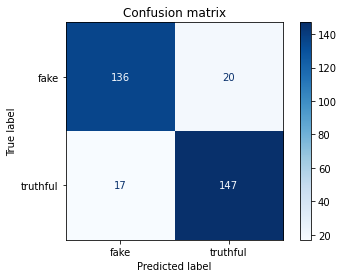

In [105]:
titles_options = [("Confusion matrix", None)]
#,("Normalized confusion matrix", 'true')
plt.figure(dpi=600)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=["fake","truthful"],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.savefig("conmat_lr.png",dpi=600)
plt.show()

## LOGISTIC REGRESSION PARAMETER TUNING

In [139]:
candidates_C = np.linspace(.1,1,100)

In [140]:
candidates_C

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [141]:
mx_score=0
winner_c=0;
list_score=[]
for candidate in candidates_C:
    clf_3 = LogisticRegression(random_state=1,C=candidate).fit(X_train,y_train)
    vd_score = clf_3.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score >= mx_score):
        winner_c=candidate
        mx_score = vd_score
    

In [142]:
import matplotlib.pyplot as plt

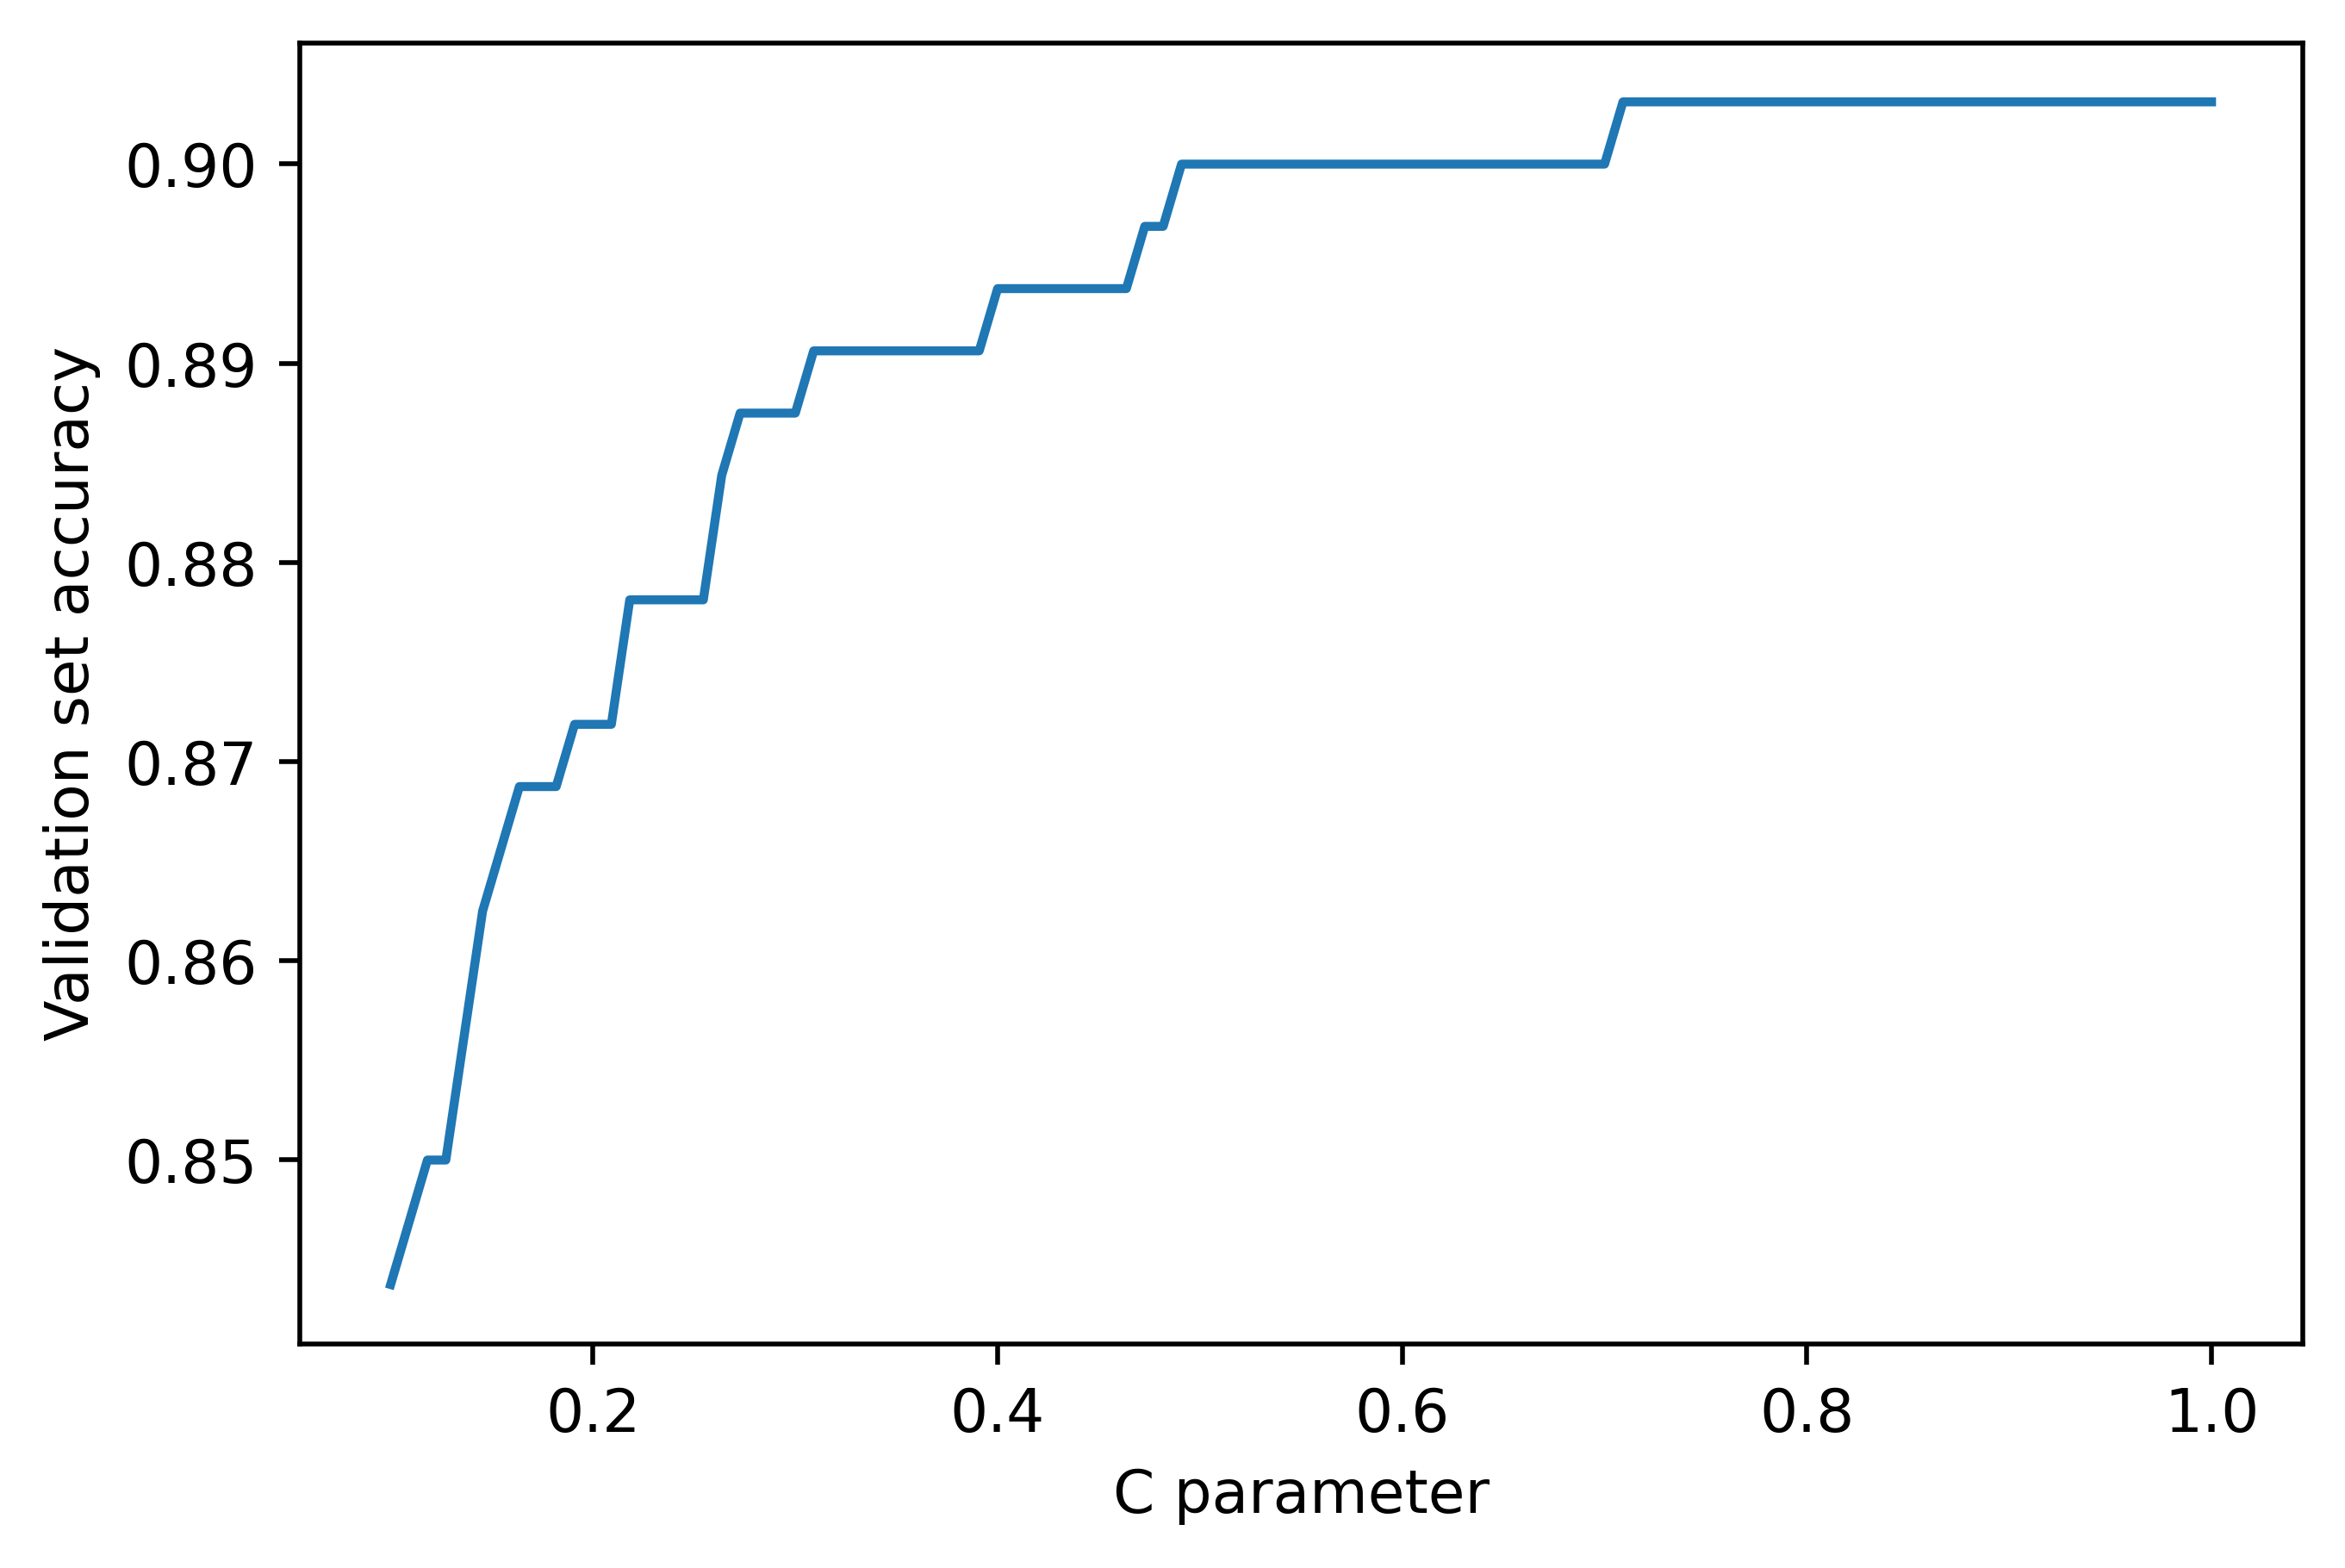

In [143]:
plt.figure(dpi=500)
plt.plot(candidates_C,list_score)
plt.xlabel("C parameter")
plt.ylabel("Validation set accuracy")

plt.savefig("C_tuning.png")
plt.show()

In [144]:
print(winner_c)
Global_winner_c = winner_c
clf_3 = LogisticRegression(random_state=1,C=winner_c)
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

1.0
0.884375
0.903125


## Tuning other parameters like solver and penalty

In [145]:
clf_3 = LogisticRegression(random_state=1,max_iter=400,C=winner_c,penalty="l1",solver="liblinear")
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

0.765625
0.79375


In [146]:
clf_3.penalty

'l1'

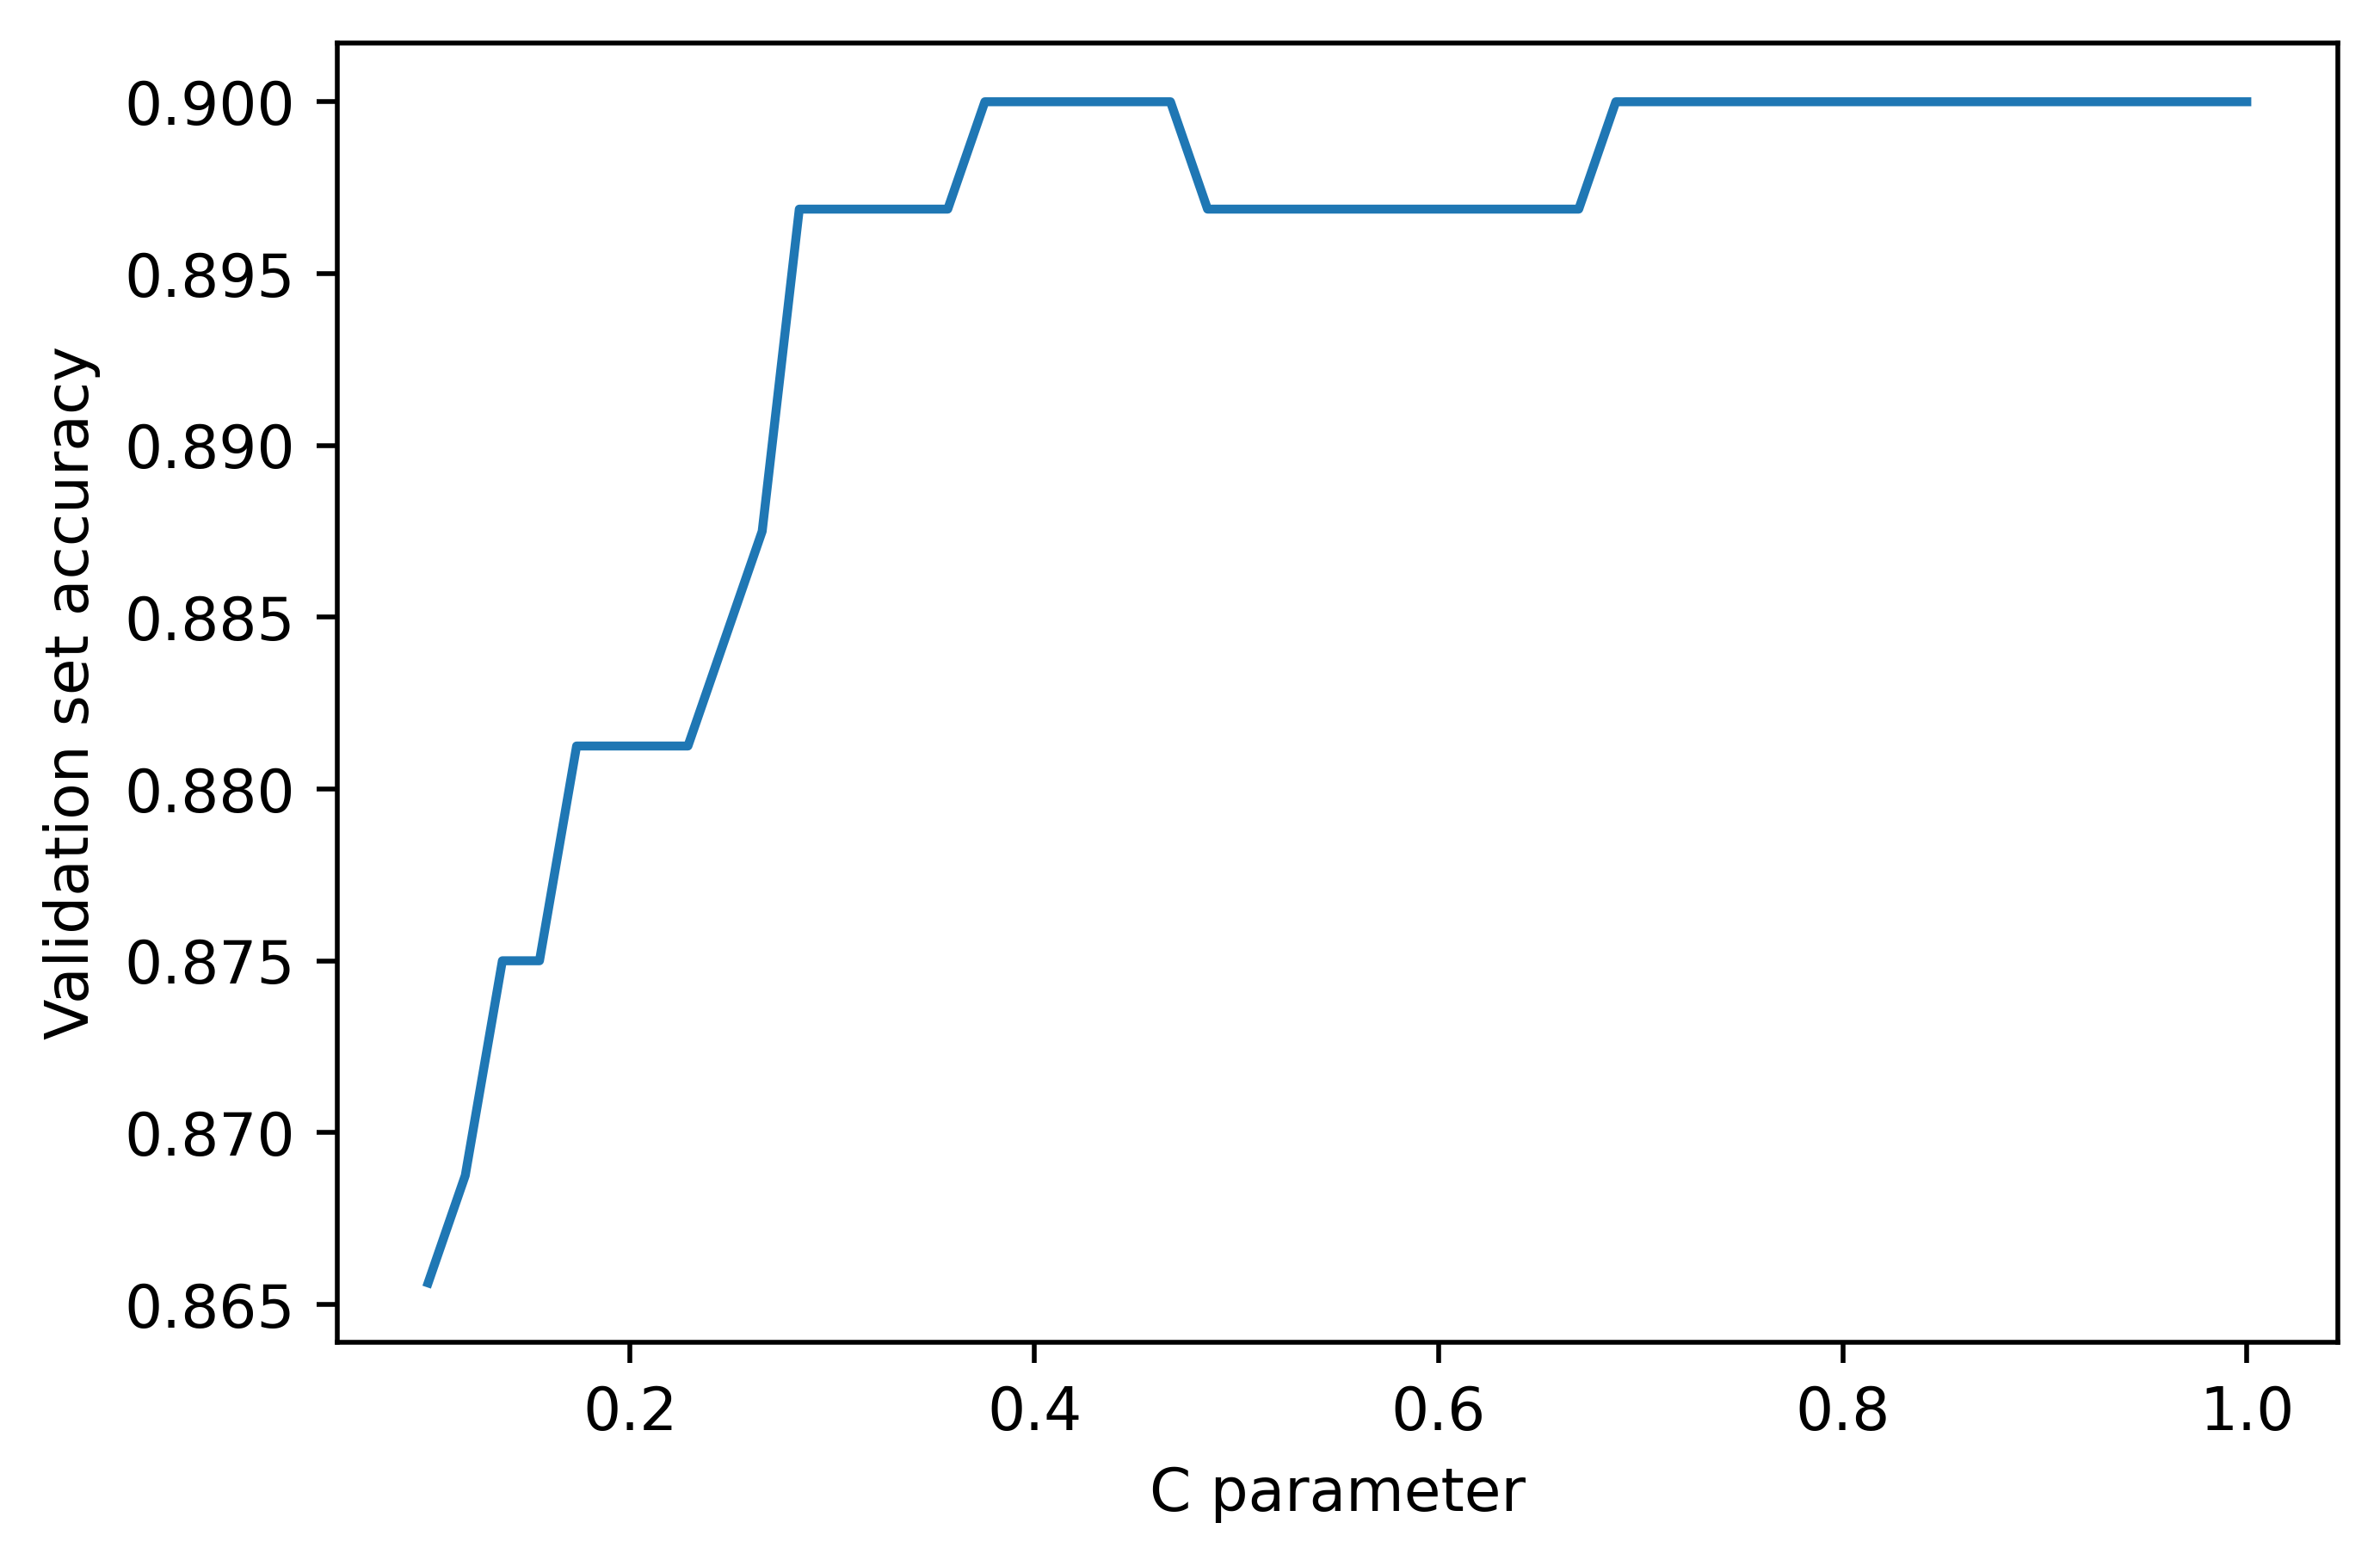

In [147]:
candidates_C = np.linspace(.1,1,50)
mx_score=0
winner_c=0;
list_score=[]
for candidate in candidates_C:
    clf_3 = LogisticRegression(random_state=1,C=candidate,penalty="l2",solver="liblinear")
    clf_3.fit(X_train,y_train)
    vd_score = clf_3.score(X_validation,y_validation)
    list_score.append(vd_score)
    
    if(vd_score >= mx_score):
        winner_c=candidate
        mx_score = vd_score
        
plt.figure(dpi=500)
plt.plot(candidates_C,list_score)
plt.xlabel("C parameter")
plt.ylabel("Validation set accuracy")

plt.savefig("C_tuning_2.png")
plt.show()

In [148]:
clf_3 = LogisticRegression(random_state=1,max_iter=400,C=winner_c,penalty="l2",solver="liblinear")
clf_3.fit(X_train,y_train)
print(clf_3.score(X_test,y_test))
print(clf_3.score(X_validation,y_validation))

0.8875
0.9


## Analyze the F1 score against thresholds

In [154]:
def F1_score_measurement(model, X_data, y_true, threshold):
    predicted_y_prob = model.predict_proba(X_data)
    predicted_y = predicted_y_prob[:,1]>threshold
    predicted_y = predicted_y*1

    tp=tn=fp=fn=0
    for i in range(0, len(predicted_y)):
        if(predicted_y[i]==0 and y_true[i] == 0):
            tn+=1
        if(predicted_y[i]==1 and y_true[i] == 1):
            tp+=1
        if(predicted_y[i]==0 and y_true[i] == 1):
            fn+=1
        if(predicted_y[i]==1 and y_true[i] == 0):
            fp+=1
    
    result = {}
    
    result["tn"]=tn
    result["fp"]=fp
    result["fn"]=fn
    result["tp"]=tp
    
    result["accuracy"]= (tn+tp)/(tn+fp+fn+tp)
    result["precision"]= tp/(tp+fp+0.00000000001)
    result["recall"] = tp/(tp+fn+0.0000000000001)
    result["F1_score"]= (2* result["precision"]*result["recall"])/(result["precision"]+result["recall"]+0.000000001)
    
    return result

print(F1_score_measurement(model,X_test,y_test,.5))
        

{'tn': 136, 'fp': 20, 'fn': 17, 'tp': 147, 'accuracy': 0.884375, 'precision': 0.8802395209580312, 'recall': 0.8963414634146335, 'F1_score': 0.8882175221586242}


In [150]:
model = LogisticRegression(random_state=1,C=Global_winner_c)
model.fit(X_train,y_train)
for i in np.linspace(0,1,100):
    res=F1_score_measurement(model,X_test,y_test,i)
    print("Threshold = ", i*1.0, " F1_score = ", res["F1_score"])

Threshold =  0.0  F1_score =  0.6776859499651521
Threshold =  0.010101010101010102  F1_score =  0.6776859499651521
Threshold =  0.020202020202020204  F1_score =  0.6776859499651521
Threshold =  0.030303030303030304  F1_score =  0.6776859499651521
Threshold =  0.04040404040404041  F1_score =  0.6776859499651521
Threshold =  0.05050505050505051  F1_score =  0.6776859499651521
Threshold =  0.06060606060606061  F1_score =  0.6776859499651521
Threshold =  0.07070707070707072  F1_score =  0.6776859499651521
Threshold =  0.08080808080808081  F1_score =  0.6776859499651521
Threshold =  0.09090909090909091  F1_score =  0.6776859499651521
Threshold =  0.10101010101010102  F1_score =  0.6790890264665916
Threshold =  0.11111111111111112  F1_score =  0.6790890264665916
Threshold =  0.12121212121212122  F1_score =  0.6790890264665916
Threshold =  0.13131313131313133  F1_score =  0.6790890264665916
Threshold =  0.14141414141414144  F1_score =  0.6790890264665916
Threshold =  0.15151515151515152  F1_s

## ROC Curve Drawing

In [151]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [152]:
def draw_ROC(model, x_data, y_true):

    #No skill probabilities
    ns_probs = [0 for _ in range(len(y_true))]

    # predict probabilities
    lr_probs = model.predict_proba(x_data)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(y_true, ns_probs)
    lr_auc = roc_auc_score(y_true, lr_probs)

    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_true, lr_probs)

    # plot the roc curve for the model
    plt.figure(dpi=1000)
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic regression')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.savefig("ROC_LR.png")
    
    plt.show()

No Skill: ROC AUC=0.500
Logistic Regression: ROC AUC=0.936


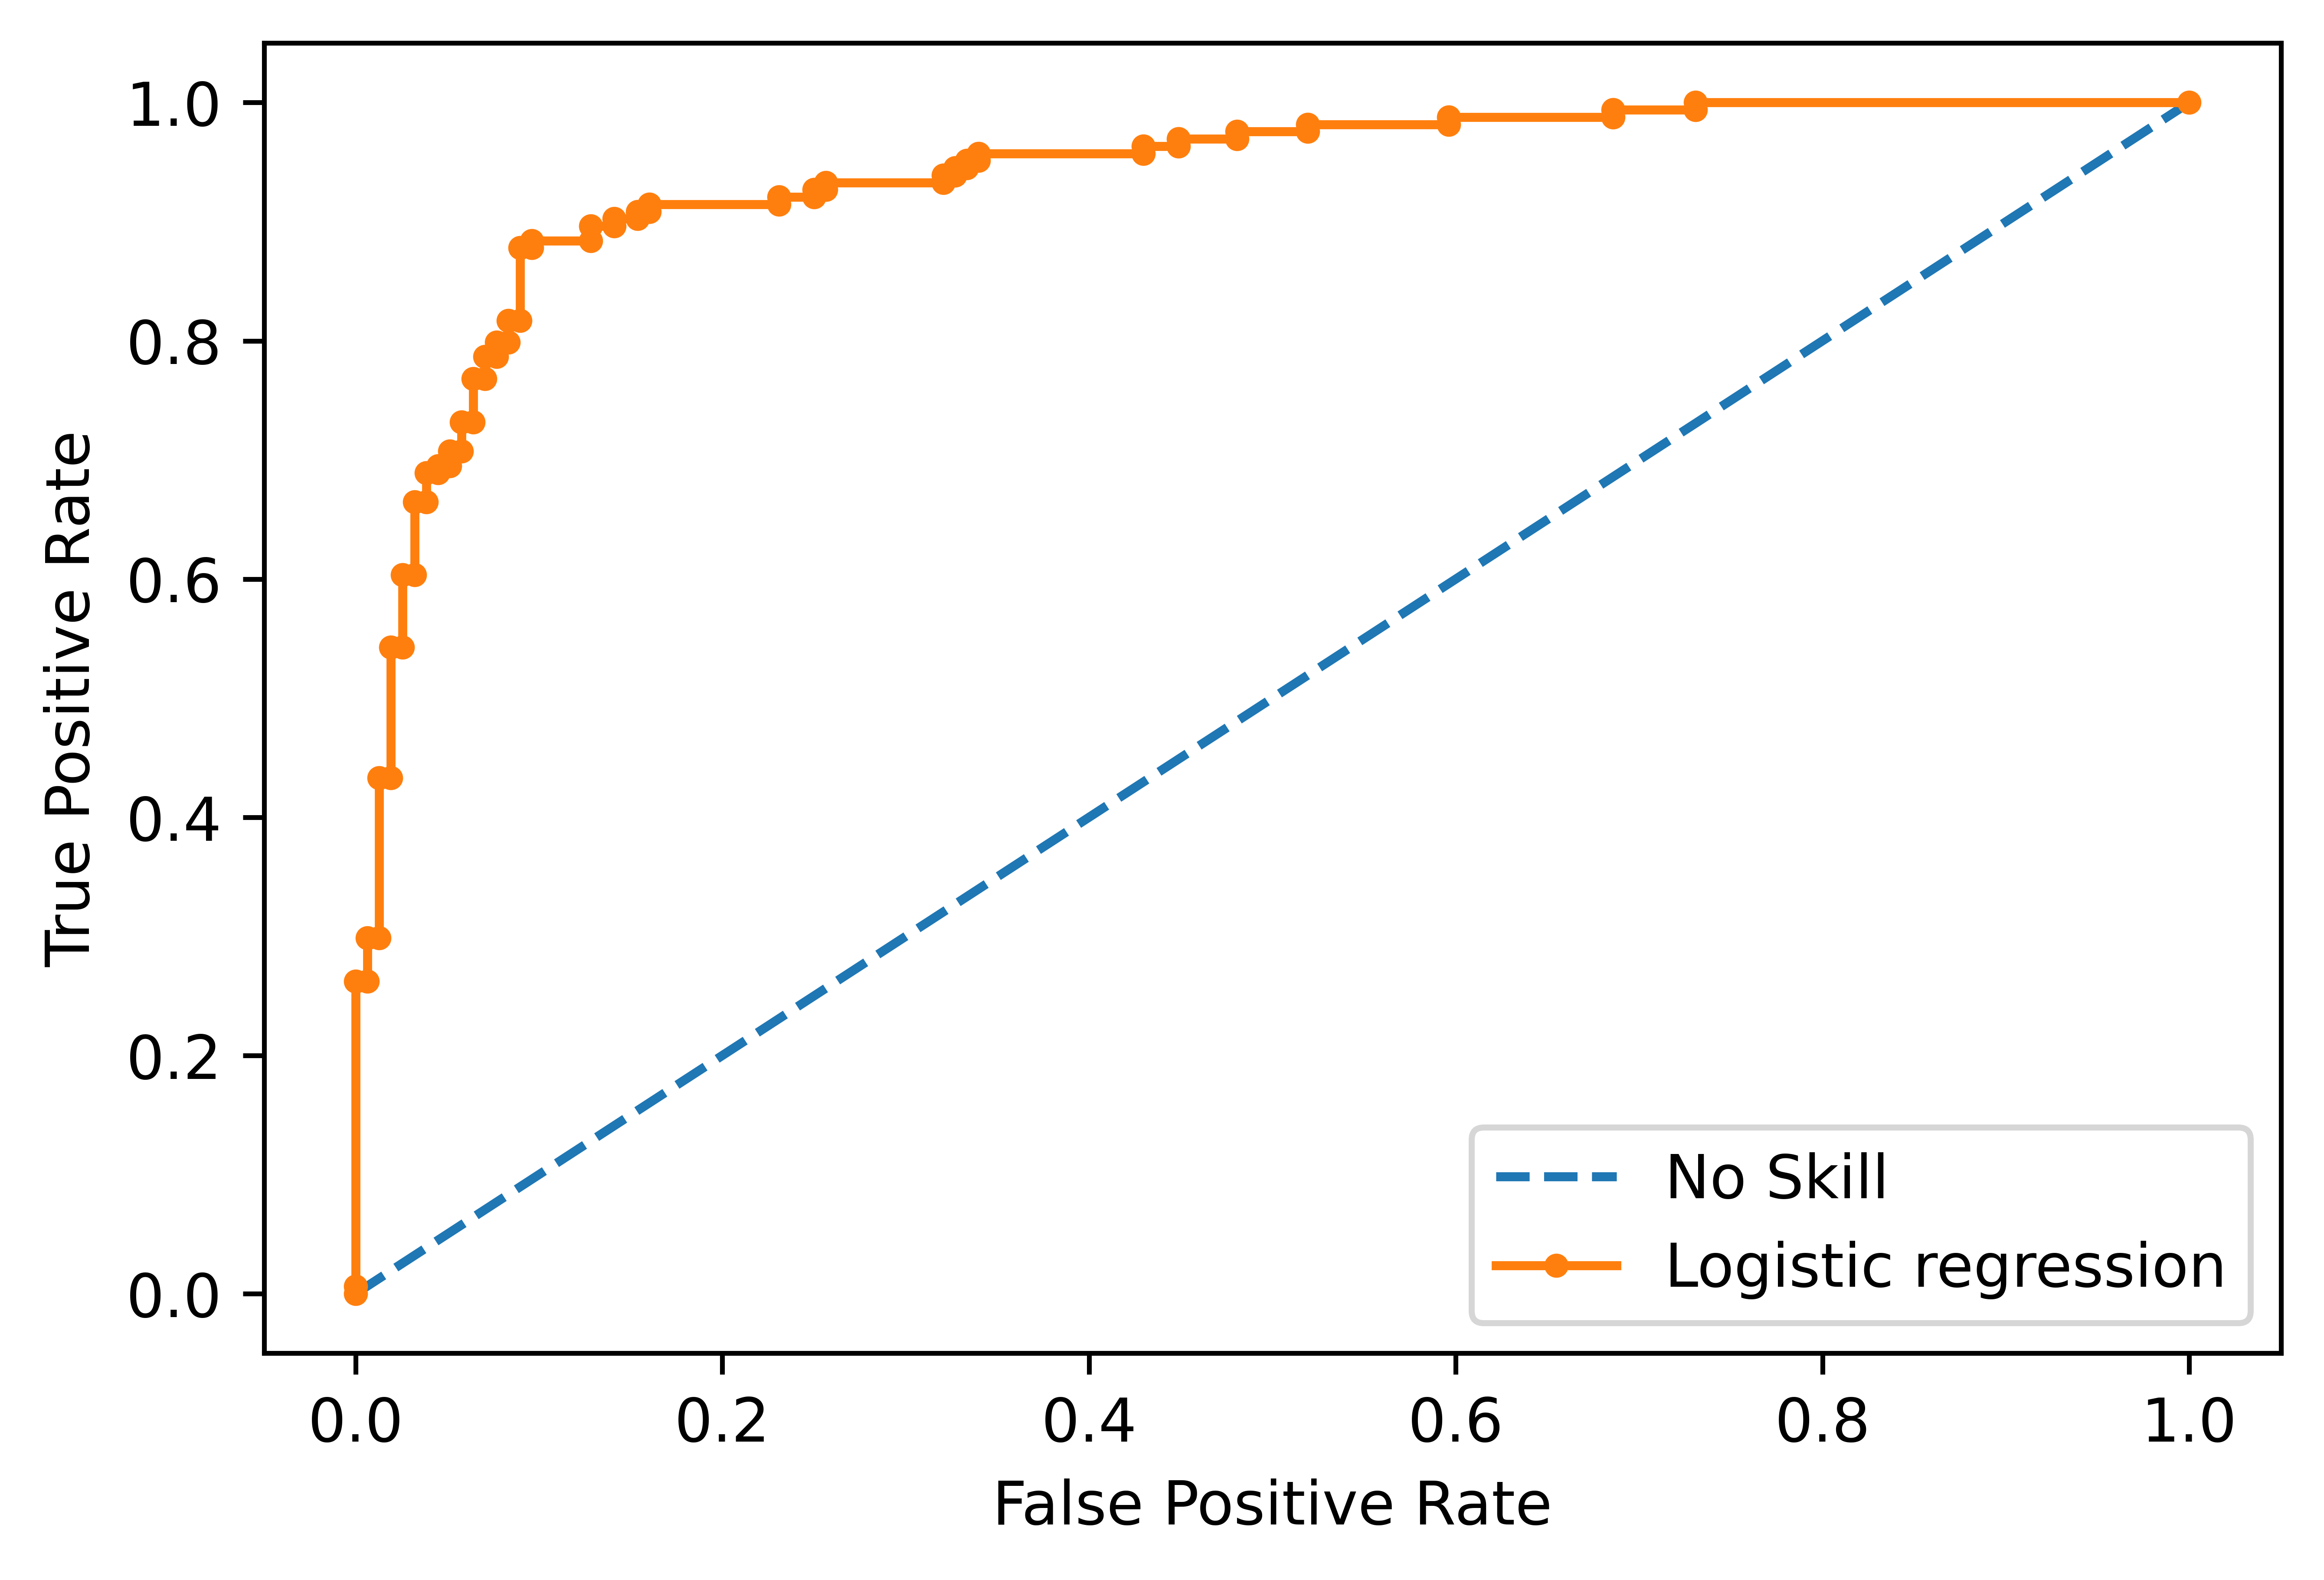

In [153]:
draw_ROC(model,X_test,y_test)